In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [3]:
# Load the dataset
url = "bank.csv"
df = pd.read_csv(url, sep=';')


In [4]:
le = preprocessing.LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])



In [10]:
# Assume 'y' column represents whether a customer purchased (1) or not (0)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int32

In [6]:
# Create the decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)




In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8751381215469614
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.43      0.47      0.45        98

    accuracy                           0.88       905
   macro avg       0.68      0.70      0.69       905
weighted avg       0.88      0.88      0.88       905



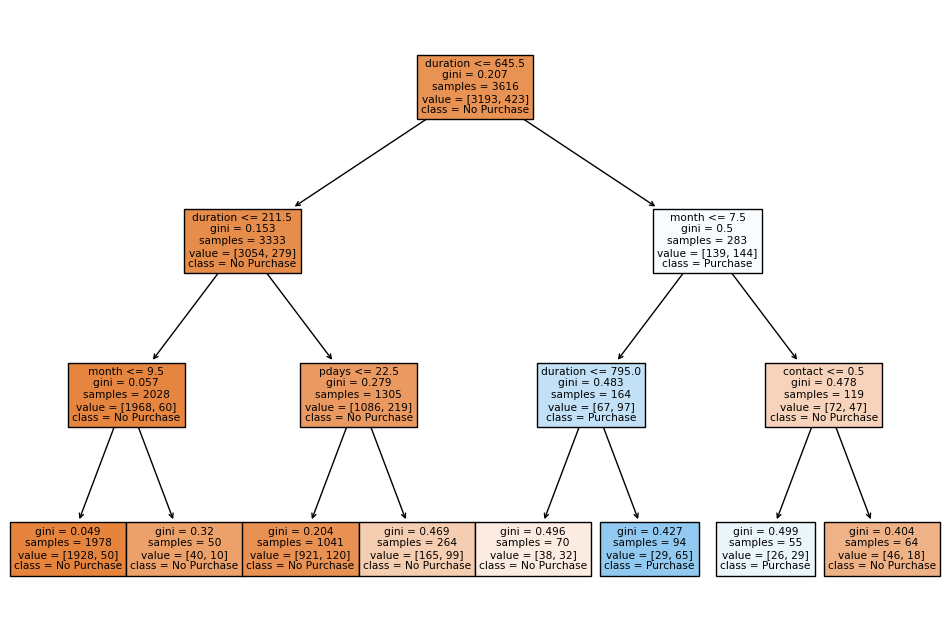

In [13]:
limited_depth_model = DecisionTreeClassifier(max_depth=3)

# Train the model
limited_depth_model.fit(X_train, y_train)

# Visualize the decision tree with a limited depth
plt.figure(figsize=(12, 8))
plot_tree(limited_depth_model, filled=True, feature_names=X.columns.tolist(), class_names=['No Purchase', 'Purchase'])
plt.show()